# Data pre-processing

Import packages

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from itertools import chain
from copy import deepcopy
%matplotlib inline

In [2]:
# set the base directory
base_dir = Path(os.path.abspath('')).parent
os.chdir(base_dir)
print("base directory:", base_dir)

base directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## NCBI

In [3]:
NCBI_data = pd.read_csv('data/raw/NCBI.tsv', sep='\t', low_memory=False)
print("NCBI data shape:", NCBI_data.shape)
print(f"NCBI number of samples: {NCBI_data.shape[0]:,}")

NCBI data shape: (340922, 66)
NCBI number of samples: 340,922


In [4]:
print("NCBI data columns:", NCBI_data.columns)

NCBI data columns: Index(['#label', 'FDA_lab_id', 'HHS_region', 'IFSAC_category', 'LibraryLayout',
       'PFGE_PrimaryEnzyme_pattern', 'PFGE_SecondaryEnzyme_pattern',
       'Platform', 'Run', 'asm_acc', 'asm_level', 'asm_stats_contig_n50',
       'asm_stats_length_bp', 'asm_stats_n_contig', 'assembly_method',
       'attribute_package', 'bioproject_acc', 'bioproject_center',
       'biosample_acc', 'isolate_identifiers', 'collected_by',
       'collection_date', 'epi_type', 'fullasm_id', 'geo_loc_name', 'host',
       'host_disease', 'isolation_source', 'lat_lon', 'ontological_term',
       'outbreak', 'sample_name', 'scientific_name', 'serovar', 'source_type',
       'species_taxid', 'sra_center', 'sra_release_date', 'strain',
       'sequenced_by', 'project_name', 'target_acc', 'target_creation_date',
       'taxid', 'wgs_acc_prefix', 'wgs_master_acc', 'minsame', 'mindiff',
       'computed_types', 'number_drugs_resistant', 'number_drugs_intermediate',
       'number_drugs_suscepti

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
NCBI_data.head()

,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Escherichia coli||ESC0165|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",3,"astA,espX1=PARTIAL,fdeC",3.6.7,2020-03-20.1,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Escherichia coli||ESC0167|Pathogen: environmental/food/other,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"merA=HMM,merC,merD=HMM,merE=HMM,merP,merR,merT,qacEdelta1,ymgB",1,espX1=PARTIAL,3.6.7,2020-03-20.1,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Escherichia coli||ESC0176|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.6.7,2020-03-20.1,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Escherichia coli||ESC0178|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,25,"emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB,pcoC,pcoD,pcoE,pcoR,pcoS,psi-GI,shsP,silA,silB,silC,silE,silF,silP,silR,silS,trxLHR,yfdX1,yfdX2,ymgB",2,"fdeC,sslE=HMM",3.6.7,2020-03-20.1,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802315.1|Escherichia coli||ESC0182|Pathogen:

### Some data exploration

In [6]:
explore_columns = ['collection_date', 'geo_loc_name', 'host', 'scientific_name',
                   'AST_phenotypes', 'AMR_genotypes_core', 'AMR_genotypes',] 

df_explore = NCBI_data[explore_columns]
df_explore.head()

,collection_date,geo_loc_name,host,scientific_name,AST_phenotypes,AMR_genotypes_core,AMR_genotypes
0,NaN,USA,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
1,NaN,USA,NaN,Escherichia coli,NaN,"aadA1,sul1,tet(A)","aadA1,acrF,blaEC,mdtM,sul1,tet(A)"
2,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
3,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
4,NaN,USA:WA,NaN,Escherichia coli,NaN,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)","acrF,aph(3'')-Ib,aph(6)-Id,blaEC,mdtM,sul2,tet(A)"


In [7]:
print("Basic information about the data:")
num_samples = df_explore.shape[0]
num_pheno = df_explore['AST_phenotypes'].count()
num_genotype = df_explore['AMR_genotypes_core'].count()

print(f"Number of samples: {num_samples:,}")
print(f"Number of samples with phenotype info: {num_pheno:,} ({num_pheno/num_samples:.2%})")
print(f"Number of samples with genotype info: {num_genotype:,} ({num_genotype/num_samples:.2%})")

df_overlap = df_explore[df_explore['AMR_genotypes_core'].notnull() & df_explore['AST_phenotypes'].notnull()]
num_overlap_samples = df_overlap.shape[0]
print(f"Number of samples with both phenotype and genotype info: {num_overlap_samples:,}\
 ({num_overlap_samples/num_samples:.2%})")

df_neither = df_explore[df_explore['AMR_genotypes_core'].isnull() & df_explore['AST_phenotypes'].isnull()]
num_neither_samples = df_neither.shape[0]
print(f"Number of samples with neither phenotype nor genotype info: {num_neither_samples:,}\
 ({num_neither_samples/num_samples:.2%})")

Basic information about the data:
Number of samples: 340,922
Number of samples with phenotype info: 6,642 (1.95%)
Number of samples with genotype info: 280,966 (82.41%)
Number of samples with both phenotype and genotype info: 5,678 (1.67%)
Number of samples with neither phenotype nor genotype info: 58,992 (17.30%)


Explore the genotype data

#### Isolate genotype data for parsing  
Note: This keeps the index of the orginal dataset

In [8]:
dataset_columns = ['collection_date', 'geo_loc_name', 'AMR_genotypes_core']
df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
num_geno_samples = df_geno.shape[0]
print(f"Number of samples with genotype info: {num_geno_samples:,} ({num_geno_samples/num_samples:.2%})")
df_geno = df_geno[dataset_columns]
df_geno.head()

Number of samples with genotype info: 280,966 (82.41%)


,collection_date,geo_loc_name,AMR_genotypes_core
1,NaN,USA,"aadA1,sul1,tet(A)"
4,NaN,USA:WA,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)"
6,NaN,Sweden,"cyaA_S352T=POINT,uhpT_E350Q=POINT"
8,NaN,USA:WA,parE_D475E=POINT
9,NaN,USA:WA,uhpT_E350Q=POINT


**Geo_loc_name**

*not determined*, *not collected*, *not provided*, *Not Provided* -> *NaN*

In [9]:
# set column as string type
alternative_nan = ['not determined', 'not collected', 'not provided', 'Not Provided',
                   'OUTPATIENT', 'Not collected', 'Not Collected', 'not available']
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].replace(alternative_nan, np.nan) 
# df_geno['geo_loc_name'].fillna('unknown', inplace=True) # replace NaN with 'unknown', Note: won't function as NaN

Remove regional info, after : (colon) or , (comma)

In [10]:
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(',').str[0]
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(':').str[0] 
df_geno.rename(columns={'geo_loc_name': 'country'}, inplace=True)
df_geno.replace('United Kingdom', 'UK', inplace=True)

Check distribution of countries, if they constitute more than 0.05% of total samples

Number of unique countries: 153
Number of countries with frequency > 0.5%: 18
Share of unknown samples: (21.09%)


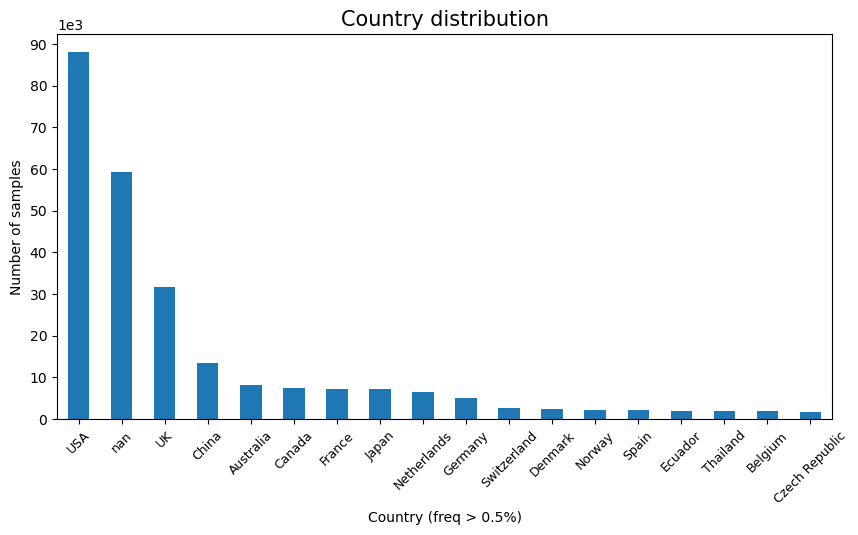

In [11]:
percentage_threshold = 0.005
frequncy_threshold = int(num_samples * percentage_threshold)
country_counts = df_geno['country'].value_counts(dropna=False)
df_country_filtered = country_counts[country_counts > frequncy_threshold]
print(f"Number of unique countries: {df_geno['country'].nunique():,}")
print(f"Number of countries with frequency > {percentage_threshold:.1%}: {df_country_filtered.shape[0]}")
print(f"Share of unknown samples: ({country_counts[np.nan]/num_geno_samples:.2%})")

ax = df_country_filtered.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Country distribution', fontsize=15)
ax.set_xlabel(f'Country (freq > {percentage_threshold:.1%})', fontsize=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Number of samples', fontsize=10)
if not os.path.exists('results/data/NCBI'):
    os.makedirs('results/data/NCBI')
ax.figure.savefig('results/data/NCBI/country_distr.png', bbox_inches='tight', dpi=300)

**Collection_date**

Group **collection date** into years and change name to 'year' 

Alternative NaN: 'missing'  
Most common format is YYYY-MM-DD  
In cases of YYYY/YYYY, we take the first year

In [12]:
alternative_nan = ['missing']
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].replace(alternative_nan, np.nan)
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('-').str[0]
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('/').str[0]
df_geno.rename(columns={'collection_date': 'year'}, inplace=True)

Filter years earlier than XXXX

In [13]:
def filter_years(df, threshold_year):
    print("Dropping samples before threshold_year", threshold_year)
    # get indices of samples before threshold_year, allows us to keep NaN values
    indices = df[df['year'].astype(float) <= threshold_year].index
    num_before = len(indices)
    # drop samples before threshold_year
    df.drop(indices, inplace=True)
    print(f"Number of samples before {threshold_year}: {num_before:,} ({num_before/num_geno_samples:.2%})")
    return df

threshold_year = 1970
print(df_geno.shape[0])
df_geno = filter_years(df_geno, threshold_year)
print(df_geno.shape[0])

280966
Dropping samples before threshold_year 1970
Number of samples before 1970: 255 (0.09%)
280711


### Investigate distributions

Number of unique years: 53
Number of years with frequency > 0.1%: 27
Number of unknown samples 92,339 (32.86%)
Earliest year: 1971
Latest year: 2023


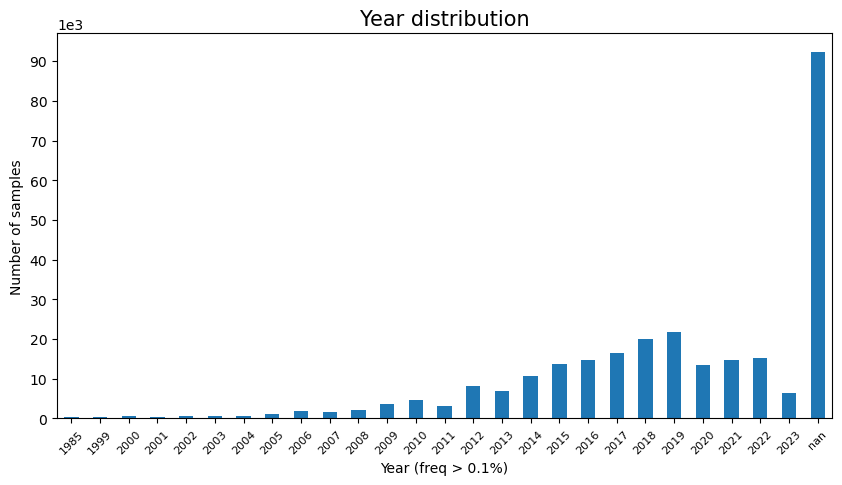

In [14]:
percentage_threshold = 0.001
frequncy_threshold = int(num_samples * percentage_threshold)
year_counts = df_geno['year'].value_counts(dropna=False)
df_year_filtered = year_counts[year_counts > frequncy_threshold]
print(f"Number of unique years: {df_geno['year'].nunique():,}")
print(f"Number of years with frequency > {percentage_threshold:.1%}: {df_year_filtered.shape[0]}")
print(f"Number of unknown samples {year_counts[np.nan]:,} ({year_counts[np.nan]/num_geno_samples:.2%})")

df_geno_notnan = df_geno[df_geno['year'].notnull()].astype({'year': 'int32'})
print(f"Earliest year: {df_geno_notnan['year'].min()}")
print(f"Latest year: {df_geno_notnan['year'].max()}")

ax = df_year_filtered.sort_index().plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Year distribution', fontsize=15)
ax.set_xlabel(f'Year (freq > {percentage_threshold:.1%})', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
ax.set_ylabel('Number of samples', fontsize=10)
ax.figure.savefig('results/data/NCBI/year_distr.png', bbox_inches='tight', dpi=300)

**AMR_genotypes_core**

In [15]:
# df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
# df_geno = df_geno[dataset_columns]
df_geno.rename(columns={'AMR_genotypes_core': 'genotypes'}, inplace=True)

Begin by making the column into a list of strings

In [16]:
df_geno.loc[:,'genotypes'] = df_geno['genotypes'].str.split(',')
df_geno['genotypes'].head(n=10)

1                      [aadA1, sul1, tet(A)]
4     [aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]
6       [cyaA_S352T=POINT, uhpT_E350Q=POINT]
8                         [parE_D475E=POINT]
9                         [uhpT_E350Q=POINT]
12                 [parC_A56T=POINT, tet(A)]
14                        [parE_I355T=POINT]
16    [aph(3'')-Ib, aph(6)-Id, sul2, tet(B)]
19          [aph(3'')-Ib, aph(6)-Id, tet(B)]
20          [aph(3'')-Ib, aph(6)-Id, tet(B)]
Name: genotypes, dtype: object

In [17]:
# Create column for number of (unique) genotypes
df_geno['num_genotypes'] = df_geno['genotypes'].apply(lambda x: len(set(x)))
df_geno.head() 

,year,country,genotypes,num_genotypes
1,NaN,USA,"[aadA1, sul1, tet(A)]",3
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2
8,NaN,USA,[parE_D475E=POINT],1
9,NaN,USA,[uhpT_E350Q=POINT],1


Filter samples with too many genes

Add column with number of point mutations

In [18]:
df_geno['num_point_mutations'] = df_geno['genotypes'].apply(lambda x: len([i for i in x if '=POINT' in i]))

In [19]:
df_geno.head()

,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",3,0
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4,0
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1


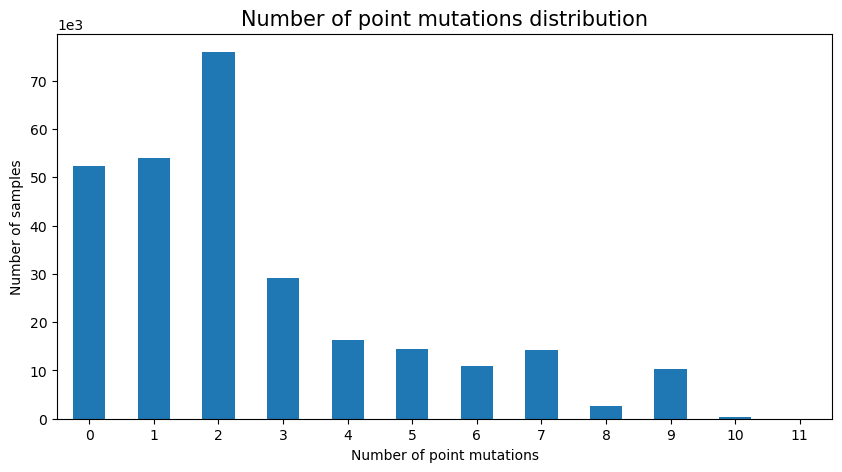

In [20]:
num_pm_counts = df_geno['num_point_mutations'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_pm_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=0
)
ax.set_title('Number of point mutations distribution', fontsize=15)
ax.set_xlabel('Number of point mutations', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_pm_distr.png', bbox_inches='tight', dpi=300)

In [21]:
unique_genotypes = set(chain(*df_geno['genotypes']))
print(set([g.split("=")[1] for g in unique_genotypes if '=' in g]))

{'PARTIAL_END_OF_CONTIG', 'PARTIAL', 'HMM', 'MISTRANSLATION', 'POINT'}


In [22]:
num_unique_genes = len(unique_genotypes)
print(f"Number of unique genes: {num_unique_genes:,}")

Number of unique genes: 1,443


Feature to remove variants, e.g. where there are dashes

In [23]:
def remove_genotype_info(df, char: str, view_duplicate_info: bool=False):
    print(f"Splitting genotypes by '{char}', removing it and everything after it")
    old_genotypes = df['genotypes'].copy() # save old genotypes for later
    df['genotypes'] = df['genotypes'].apply(lambda x: list(set([g.split(char)[0] for g in x])))
    
    if view_duplicate_info:
        # count number of samples which now have duplicate genotypes
        num_duplicates = df['genotypes'].apply(lambda x: len(x) - len(set(x))).sum()
        df['num_duplicates'] = df['genotypes'].apply(lambda x: len(x) - len(set(x)))
        print(f"Number of duplicate genotype instances: {num_duplicates:,}")
        print(f"Number of samples with duplicate genotypes: {df[df['num_duplicates'] > 0].shape[0]:,}")
        print(f"Maximum number of duplicates in a sample: {df['num_duplicates'].max()}")
        index_max_duplicates = df['num_duplicates'].idxmax()
        print("Genes in sample with the most duplicates:")
        print(*old_genotypes[index_max_duplicates], sep="\n") # uncomment to see the genotypes with the most duplicates
        # remove duplicates
        df['genotypes'] = df['genotypes'].apply(lambda x: list(set(x)))
        df.drop(columns=['num_duplicates'], inplace=True)
    
    return df

In [24]:
print(f"Number of unique genes: {len(set(chain(*df_geno['genotypes']))):,}")
remove_extra_genotype_info = True
if remove_extra_genotype_info:
    df_geno = remove_genotype_info(df_geno, '-', view_duplicate_info=True)
    print(f"Number of unique genes without extra info: {len(set(chain(*df_geno['genotypes']))):,}")

Number of unique genes: 1,443
Splitting genotypes by '-', removing it and everything after it
Number of duplicate genotype instances: 0
Number of samples with duplicate genotypes: 0
Maximum number of duplicates in a sample: 0
Genes in sample with the most duplicates:
aadA1
sul1
tet(A)
Number of unique genes without extra info: 887


Feature to remove assembly variations, e.g. partials, mistranslation variants and HMM 

In [25]:
exclude_assembly_variants = ['=PARTIAL', '=MISTRANSLATION', '=HMM']
print(f"Removing genotypes with assembly variants: {exclude_assembly_variants}")
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: [g for g in x if not g.endswith(tuple(exclude_assembly_variants))]) 
df_geno = df_geno[df_geno['genotypes'].apply(lambda x: len(x) > 0)] # Remove any rows where genotypes are empty
print(f"Number of unique genes without assembly variants: {len(set(chain(*df_geno['genotypes']))):,}")

Removing genotypes with assembly variants: ['=PARTIAL', '=MISTRANSLATION', '=HMM']
Number of unique genes without assembly variants: 697


Feature to remove redundancies where there is, for example, **genotype** *and* **genotype=PARTIAL_END_OF_CONTIG**,  
but keep **genotype=PARTIAL_END_OF_CONTIG** when **genotype** is not present

In [26]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['gyrA_D87N=POINT', 'blaCTX', 'sul1', 'mph(A)', 'dfrA17', 'blaTEM', 'catB3=PARTIAL_END_OF_CONTIG', "aph(3'')", 'blaOXA', 'tet(B)', "aac(6')", 'blaOXA=PARTIAL_END_OF_CONTIG', 'aadA5', 'gyrA_S83L=POINT', 'aph(6)', 'sul2', 'parE_L416F=POINT', 'dfrA14', 'parC_S80I=POINT', 'tet(A)']
['tet(B)', 'cyaA_S352T=POINT', 'blaCMY=PARTIAL_END_OF_CONTIG', 'sul2']
Maximum number of genotypes in a sample: 48


In [27]:
assembly_chars = ['=PARTIAL', '=MISTRANSLATION', '=HMM', '=PARTIAL_END_OF_CONTIG']
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: list(set(x) - set([g for g in x if g.endswith(tuple(assembly_chars)) and g.split("=")[0] in x])))

In [28]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['gyrA_D87N=POINT', 'gyrA_S83L=POINT', 'blaCTX', 'sul1', 'mph(A)', 'dfrA17', 'blaTEM', 'aph(6)', 'sul2', 'catB3=PARTIAL_END_OF_CONTIG', "aph(3'')", 'blaOXA', 'tet(B)', 'parE_L416F=POINT', 'dfrA14', "aac(6')", 'parC_S80I=POINT', 'tet(A)', 'aadA5']
['tet(B)', 'cyaA_S352T=POINT', 'blaCMY=PARTIAL_END_OF_CONTIG', 'sul2']
Maximum number of genotypes in a sample: 48


Check for cases where info is too limited

In [29]:
print(f"Number of samples with only one genotype: {df_geno[df_geno['num_genotypes'] == 1].shape[0]:,}")
print(f"Number of samples with one genotype and max one of (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & ((df_geno['country'].isnull()) | (df_geno['year'].isnull()))].shape[0]:,}")
print(f"Number of samples with one genotype and no other info (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].shape[0]:,}")

Number of samples with only one genotype: 26,554
Number of samples with one genotype and max one of (country, year): 10,764
Number of samples with one genotype and no other info (country, year): 4,143


Exclude cases where there is *only* one genotype and **no other info**

In [30]:
indices = df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].index
print(f"Number of samples with one genotype and no other info (country, year): {len(indices):,}")
df_geno.drop(indices, inplace=True)

Number of samples with one genotype and no other info (country, year): 4,143


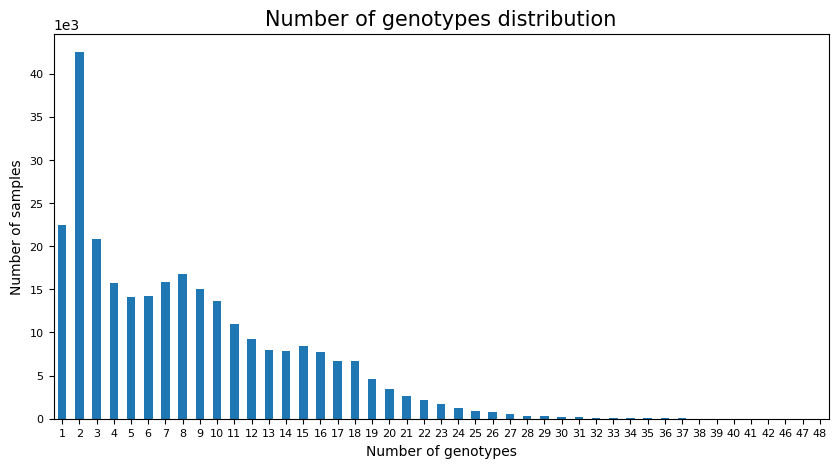

In [31]:
num_gene_counts = df_geno['num_genotypes'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_gene_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=8, rot=0
)
ax.set_title('Number of genotypes distribution', fontsize=15)
ax.set_xlabel('Number of genotypes', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_genotypes_distr.png', bbox_inches='tight', dpi=300)

In [32]:
def filter_gene_counts(df, threshold_num):
    print(f"Dropping samples with more than {threshold_num} genotypes")
    # get indices of samples with more than threshold_num genotypes
    indices = df[df['num_genotypes'] > threshold_num].index
    num_above = len(indices)
    # drop samples with more than threshold_num genotypes
    df.drop(indices, inplace=True)
    print(f"Number of samples with more than {threshold_num} genotypes: {num_above:,}")
    return df

# df_geno = filter_gene_counts(df_geno, 40)

In [33]:
df_geno[df_geno['num_genotypes'] == 48]['genotypes'].head()

223665    [gyrA_D87N=POINT, blaNDM, blaCTX, sul1, mph(A), dfrA17, mcr, tet(M), blaTEM, ble, catB3=PARTIAL_END_OF_CONTIG, catA1, aph(3''), blaOXA, aac(6'), qnrB, aadA5, aac(3), gyrA_S83L=POINT, floR, aph(3'), blaDHA, glpT_E448K=POINT, aadA1=PARTIAL_END_OF_CONTIG, aph(6), sul2, sul3, qnrB4, parE_L416F=POINT, qnrB1, dfrA14, parC_S80I=POINT, tet(A)]
Name: genotypes, dtype: object

Final dataset

In [34]:
print(f"Final number of samples: {df_geno.shape[0]:,}")
df_geno.head(n=30)

Final number of samples: 276,445


,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, tet(A), sul1]",3,0
4,NaN,USA,"[sul2, aph(3''), aph(6), tet(A)]",4,0
6,NaN,Sweden,"[uhpT_E350Q=POINT, cyaA_S352T=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1
12,NaN,USA,"[tet(A), parC_A56T=POINT]",2,1
14,NaN,Sweden,[parE_I355T=POINT],1,1
16,NaN,Indonesia,"[aph(3''), tet(B), aph(6), sul2]",4,0
19,NaN,USA,"[aph(3''), tet(B), aph(6)]",3,0
20,NaN,Canada,"[aph(3''), tet(B), aph(6)]",3,0


Write processed genotype data to .csv

In [35]:
# path = 'data/NCBI_genotype_parsed.pkl'
# df_geno.to_pickle(path)

Count gene occurences

In [36]:
# get all unique genotypes
unique_genotypes = set(chain(*df_geno['genotypes']))
print(f"Number of unique genotypes: {len(unique_genotypes):,}")
counter = Counter(chain(*df_geno['genotypes']))
print(counter.most_common(10))
frequncy_threshold = 5
print(f"Number of genotypes with frequency > {frequncy_threshold}: {len([i for i in counter.values() if i > frequncy_threshold]):,}")

Number of unique genotypes: 685
[('glpT_E448K=POINT', 163056), ('sul2', 111195), ('aph(6)', 106303), ("aph(3'')", 105828), ('blaTEM', 96206), ('tet(A)', 96016), ('gyrA_S83L=POINT', 92342), ('sul1', 71308), ('blaCTX', 70114), ('parC_S80I=POINT', 66982)]
Number of genotypes with frequency > 5: 399


## TESSy data

In [37]:
path = "data/raw/TESSy.csv"
TESSy_data = pd.read_csv(path, low_memory=False)
TESSy_data.head()

,ReportingCountry,DateUsedForStatisticsISO,LaboratoryCode,Specimen,PatientCounter,Gender,Age,IsolateId,HospitalId,PatientType,HospitalUnitType,Pathogen,DateOfHospitalisationISOdate,ResultPCRmec,ResultPbp2aAggl,Serotype,ESBL,ResultCarbapenemases,Antibiotic,SIR,ResultZoneSign,ResultZoneValue,ResultZoneSIR,ResultMICSign,ResultMICValue,ResultMICSIR,ResultEtestSign,ResultEtestValue,ResultEtestSIR,DiskLoad,ReferenceGuidelinesSIR
0,BE,2000-01-01,BE003,BLOOD,-1659791293,M,47.0,a100166,003A,INPAT,O,STAAUR,NaN,NEG,NaN,NaN,NaN,NaN,OXA,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BE,2000-01-01,BE008,BLOOD,1201581292,M,85.0,27,008A,INPAT,INTMED,STRPNE,NaN,NaN,NaN,UNK,NaN,NaN,OXA,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BE,2000-01-01,BE008,BLOOD,1201581292,M,85.0,27,008A,INPAT,INTMED,STRPNE,NaN,NaN,NaN,UNK,NaN,NaN,CTX,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BE,2000-01-01,BE008,BLOOD,1201581292,M,85.0,27,008A,INPAT,INTMED,STRPNE,NaN,NaN,NaN,UNK,NaN,NaN,ERY,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BE,2000-01-01,BE008,BLOOD,1201581292,M,85.0,27,008A,INPAT,INTMED,STRPNE,NaN,NaN,NaN,UNK,NaN,NaN,OFX,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# get pathogens of interest
pathogens = ['ESCCOL']
TESSy_data = TESSy_data[TESSy_data['Pathogen'].isin(pathogens)]

In [39]:
if len(pathogens) > 1:
        cols = ['ReportingCountry', 'Specimen', 'DateUsedForStatisticsISO', 'LaboratoryCode', 'PatientCounter',
                'Gender', 'Age','IsolateId', 'Pathogen' 'Antibiotic', 'SIR']
        df = TESSy_data[cols]
        df = df.rename(columns={'ReportingCountry': 'country',
                'DateUsedForStatisticsISO': 'date',
                'Gender': 'gender',
                'Age': 'age',
                'Pathogen': 'pathogen',
                'Antibiotic': 'antibiotic',
                'Specimen': 'specimen',
                'SIR': 'phenotype'})
else:
        cols = ['ReportingCountry', 'Specimen', 'DateUsedForStatisticsISO', 'LaboratoryCode', 'PatientCounter',
                'Gender', 'Age','IsolateId', 'Antibiotic', 'SIR']
        df = TESSy_data[cols]
        df = df.rename(columns={'ReportingCountry': 'country',
                'DateUsedForStatisticsISO': 'date',
                'Gender': 'gender',
                'Age': 'age',
                'Antibiotic': 'antibiotic',
                'Specimen': 'specimen',
                'SIR': 'phenotype'})
        
print(f"Number of samples: {TESSy_data.shape[0]:,}")
df.head(n=20)

Number of samples: 13,992,446


,country,specimen,date,LaboratoryCode,PatientCounter,gender,age,IsolateId,antibiotic,phenotype
57,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,AMK,S
58,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,AMP,S
59,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,CTX,S
60,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,CRO,S
61,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,CIP,S
62,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,GEN,S
63,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,IPM,S
64,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,TOB,S
65,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,CAZ,S
66,EL,BLOOD,2000-01-01,EL040,1316257590,UNK,NaN,34/1/00_,OFX,S


In [40]:
df.dtypes

country            object
specimen           object
date               object
LaboratoryCode     object
PatientCounter      int64
gender             object
age               float64
IsolateId          object
antibiotic         object
phenotype          object
dtype: object

We are interested in *E.coli*

Reorganize columns to form unique ID:  
IsolateId: Unique ID for each isolate in the lab and year  
New ID: Combine IsolateId with year, country

In [41]:
alpha_ids = df[df['IsolateId'].astype(str).str.isalpha()]['IsolateId'].unique()
print("Number of purely alphabetical ids:", len(alpha_ids))
for id in alpha_ids:
    print(id)

Number of purely alphabetical ids: 2733
A
nan
B
eco
paxinos
giannoyl
apadhmht
paschalh
antonioy
koykoyts
antonopo
BK
psariano
mpoutsio
mpandelh
arakatsa
kampanh
kostara
x
XXX
seferfa
xx
xxx
X
XKRRZRE
HAGYRSPP
WAKWZTUQX
GACCURF
NEJMMIO
XKOLDGMKR
FEPGKU
YWLSRT
JNIYMDJ
YAKGR
MKPQHGOQQ
BWITHES
HQQCK
XNFZHESVUESJ
KWDCR
KQBAG
MEZFNNOKHV
WWOZZUY
BWYPHEM
VZXKEAMDHVY
YWSMTSU
KKRWCECCW
KKORLAOP
HWDLZLEK
WWDMSTZWUKYP
WKRJHNHWHDYY
HWORHN
GAZJDRDS
YAOTDAVZ
NAKMTSTK
NAOTHLMCW
YWREDT
BHFLDUS
BEIYQDJP
CAOLZNEGC
CAOTD
HKOCZU
JZAMME
AHBAGOO
WAAYS
WAKAGEJMK
MKYCSFLZWKYP
XWWCKLFU
YAINDUDJ
GAZJDRDHDRIX
GWKETIMNH
WKOWRIBM
MWJMM
EQKOTAHUDPFT
AKRPMIWCO
GAOMTX
NKRAGU
WKKLD
EQIGDNOG
IARTHLMG
MWYGDT
BWWCK
RWQRR
BNFDEAUQQ
HKQFDSHODWXK
HKQY
FAIKDNEK
YWRQPUFVUOYQ
BKJKDR
XWOZNNFNOXJR
IKSYJOWC
XWIYR
GAAMTX
XWIKDLT
XWPYMOWC
WWQQ
YAIMAEM
JNOGDRF
BQDJHEMOL
GEYCDRUEOENX
YWOPHEVZ
YAIYMNPAWRFZ
NWIMLOO
HAVCQ
KWOPDLM
WKFRDL
CAKQHNHGU
NPRRY
NKRJHE
WAXSBLBKU
MAJCYY
WKRPFEPKV
KKKQ
QEIJZRUFHXQG
AKRPMIM
WNBWZRE
KEOYTBF
VRBLZNU
CW

**Conclusion**: There are nan values, and also some alternative nan_values: "unknown", "UNKNOWN" 

#### Investigate missing values and alternative nan values

IsolateId

In [42]:
alternative_nan = ["unknown", "UNKNOWN"]
df['IsolateId'].replace(alternative_nan, np.nan, inplace=True)
print(f"Number of NaN in IsolateId: {df['IsolateId'].isnull().sum():,}")
df = df[df['IsolateId'].notnull()]
print(f"Number of samples after dropping NaN in IsolateId: {df.shape[0]:,}")

Number of NaN in IsolateId: 150,240
Number of samples after dropping NaN in IsolateId: 13,842,206


Age

In [43]:
print(df[df['age'] == 0].shape[0])
print(df[df['age'] == 1].shape[0])

211729
22037


Gender

In [44]:
print(df['gender'].value_counts())
alternative_nan = ["UNK", "O"]
df['gender'].replace(alternative_nan, np.nan, inplace=True)

gender
F      6796993
M      6124749
UNK     913717
O           10
Name: count, dtype: int64


In [45]:
print(f"Number of NaN in country: {df['country'].isnull().sum():,}")
print(f"Number of NaN in date: {df['date'].isnull().sum():,}")
print(f"Number of NaN in LaboratoryCode: {df['LaboratoryCode'].isnull().sum():,}")
print(f"Number of NaN in PatientCounter: {df['PatientCounter'].isnull().sum():,}")
print(f"Number of NaN in age: {df['age'].isnull().sum():,}")
print(f"Number of NaN in gender {df['gender'].isnull().sum():,}")
print(f"Number of NaN in pathogen {df['pathogen'].isnull().sum():,}") if len(pathogens) > 1 else None
print(f"Number of NaN in antibiotic {df['antibiotic'].isnull().sum():,}")
print(f"Number of NaN in specimen {df['specimen'].isnull().sum():,}")
print(f"Number of NaN in phenotype {df['phenotype'].isnull().sum():,}")

Number of NaN in country: 0
Number of NaN in date: 0
Number of NaN in LaboratoryCode: 0
Number of NaN in PatientCounter: 0
Number of NaN in age: 537,392
Number of NaN in gender 920,464
Number of NaN in antibiotic 0
Number of NaN in specimen 0
Number of NaN in phenotype 0


In [46]:
df['year'] = df['date'].str.split('-').str[0]
# df.drop(columns=['date'], inplace=True)
print(f"Number of years: {df['year'].nunique():,}, spanning from {df['year'].min()} to {df['year'].max()}")

Number of years: 21, spanning from 2000 to 2020


We will create a new ID from IsolateID using country, year, PatientCounter and IsolateID

In [47]:
df['ID'] = df['country'].astype(str) + '_' + df['LaboratoryCode'].astype(str) + '_' + df['PatientCounter'].astype(str) + '_' + df['year'].astype(str) + '_' + df['IsolateId'].astype(str)
print(f"Number of unique IDs when ID = country_LaboratoryCode_year_IsolateId: {df['ID'].nunique():,}")

Number of unique IDs when ID = country_LaboratoryCode_year_IsolateId: 1,564,446


In [48]:
df['ID'].value_counts().head()

ID
NL_NL016_1772545963_2007_6395612      60
NL_NL010_-647498646_2002_B889151      48
NL_NL010_1053581463_2002_B889239      48
NL_NL010_-409734922_2002_B889200      48
DK_DK011_1982777242_2008_08037825A    45
Name: count, dtype: int64

Example case of duplicate entries: NL_NL016_1772545963_2007_6395612

In [49]:
df[df['ID'] == 'NL_NL016_1772545963_2007_6395612']['antibiotic'].value_counts()

antibiotic
AMK    6
AMX    6
AMP    6
CAZ    6
CRO    6
CIP    6
GEN    6
TOB    6
IPM    6
MEM    6
Name: count, dtype: int64

In [50]:
df[df['ID'] == 'NL_NL016_1772545963_2007_6395612'][['antibiotic', 'phenotype']].value_counts()

antibiotic  phenotype
AMK         S            6
AMP         R            6
AMX         R            6
CAZ         R            6
CIP         S            6
CRO         R            6
GEN         S            6
IPM         S            6
MEM         S            6
TOB         S            6
Name: count, dtype: int64

In [51]:
# drop "I" phenotypes
print(f"Number of I phenotypes: {df[df['phenotype'] == 'I'].shape[0]:,}")
df.drop(df[df['phenotype'] == 'I'].index, inplace=True)

# # drop duplicates
# print(f"Number of samples before dropping duplicates: {df.shape[0]:,}")
# df.drop_duplicates(subset=['ID', 'antibiotic', 'phenotype'], inplace=True)
# print(f"Number of samples after dropping duplicates: {df.shape[0]:,}")

Number of I phenotypes: 252,351


In [52]:
df[df['ID'] == 'NL_NL016_1772545963_2007_6395612'][['antibiotic', 'phenotype']].value_counts()

antibiotic  phenotype
AMK         S            6
AMP         R            6
AMX         R            6
CAZ         R            6
CIP         S            6
CRO         R            6
GEN         S            6
IPM         S            6
MEM         S            6
TOB         S            6
Name: count, dtype: int64

In [53]:
df['ID'].value_counts().head()

ID
NL_NL016_1772545963_2007_6395612      60
NL_NL010_-409734922_2002_B889200      48
NL_NL010_-647498646_2002_B889151      48
NL_NL010_1053581463_2002_B889239      48
DK_DK011_1982777242_2008_08037825A    45
Name: count, dtype: int64

In [54]:
df[df['ID'] == 'PL_PL163_46143472_2016_3325k/16'].nunique()

country            1
specimen           1
date               1
LaboratoryCode     1
PatientCounter     1
gender             1
age                1
IsolateId          1
antibiotic        22
phenotype          2
year               1
ID                 1
dtype: int64

**Conclusion**: Now the dataset contains a uniquely identifying ID 

check for cases where there are multiple phenotypes for the same antibiotic  
**Conclusion**: There are none, however, when pphenotypes are aggregated this might be worth looking at again

Investigate antibiotics duplicates

In [55]:
duplicates = df.duplicated(subset=['ID', 'antibiotic', 'phenotype'])
print(f"Are there duplicates of ID-antibiotic-phenotype? {'Yes' if duplicates.any() else 'No'}")
df.drop_duplicates(subset=['ID', 'antibiotic', 'phenotype'], inplace=True)

Are there duplicates of ID-antibiotic-phenotype? Yes


In [56]:
num_unique_phenotypes = df.groupby(['ID', 'antibiotic'])['phenotype'].nunique().sort_values(ascending=False)
print(f"Are there IDs with more than one phenotype per antibiotic? {'Yes' if any(num_unique_phenotypes > 1) else 'No'}")
df.drop_duplicates(subset=['ID', 'antibiotic'], inplace=True)

Are there IDs with more than one phenotype per antibiotic? No


Create new dataframe that groups by ID, i.e. where a row equals a specific tested isolate

In [57]:
# df_agg = df_sub.groupby('ID')[['antibiotic', 'phenotype']].agg(list).reset_index()

#### Attempt to redo this code to first aggregate antibiotic and phenotype into lists, then add one value
#### for the rest of the columns (using ID), to avoid having to deal with the lists later on (probably faster)

df_agg = df.groupby('ID')[['antibiotic', 'phenotype']].agg(list).reset_index()
df_agg.head()

,ID,antibiotic,phenotype
0,AT_AT001_-1006697741_2007_B11018,"[AMK, CAZ, CIP, CTX, GEN, IPM, TOB]","[S, S, S, S, S, S, S]"
1,AT_AT001_-100784477_2004_B02689,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]"
2,AT_AT001_-1011999410_2003_B13474,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]"
3,AT_AT001_-1012392910_2004_B30389,"[AMK, GEN, AMP, CIP, CAZ, CTX, TOB]","[S, S, S, S, S, S, S]"
4,AT_AT001_-1014035053_2001_B29581,"[AMP, CTX, GEN, TOB]","[S, S, S, S]"


In [58]:
df_agg['phenotypes'] = df_agg.apply(lambda x: [x['antibiotic'][i] + "_" + x['phenotype'][i] for i in range(len(x['antibiotic']))], axis=1)
df_agg.head(n=10)

,ID,antibiotic,phenotype,phenotypes
0,AT_AT001_-1006697741_2007_B11018,"[AMK, CAZ, CIP, CTX, GEN, IPM, TOB]","[S, S, S, S, S, S, S]","[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
1,AT_AT001_-100784477_2004_B02689,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
2,AT_AT001_-1011999410_2003_B13474,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
3,AT_AT001_-1012392910_2004_B30389,"[AMK, GEN, AMP, CIP, CAZ, CTX, TOB]","[S, S, S, S, S, S, S]","[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]"
4,AT_AT001_-1014035053_2001_B29581,"[AMP, CTX, GEN, TOB]","[S, S, S, S]","[AMP_S, CTX_S, GEN_S, TOB_S]"
5,AT_AT001_-101448317_2004_B00326,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
6,AT_AT001_-1014592632_2007_B50107,"[AMK, AMP, CAZ, CIP, CTX, GEN, IPM, TOB]","[S, R, S, S, S, S, S, S]","[AMK_S, AMP_R, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
7,AT_AT001_-1015959347_2005_B08601,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
8,AT_AT001_-1021733075_2006_B20000,"[AMK, AMP, CAZ, CIP, CTX, GEN, TOB]","[S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
9,AT_AT001_-1024339024_2007_B45803,"[AMK, AMP, CAZ, CIP, CTX, GEN, IPM, TOB]","[S, S, S, S, S, S, S, S]","[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"


In [59]:
df_agg.drop(columns=['antibiotic', 'phenotype'], inplace=True)
df_agg.head(n=10)

,ID,phenotypes
0,AT_AT001_-1006697741_2007_B11018,"[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
1,AT_AT001_-100784477_2004_B02689,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
2,AT_AT001_-1011999410_2003_B13474,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
3,AT_AT001_-1012392910_2004_B30389,"[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]"
4,AT_AT001_-1014035053_2001_B29581,"[AMP_S, CTX_S, GEN_S, TOB_S]"
5,AT_AT001_-101448317_2004_B00326,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
6,AT_AT001_-1014592632_2007_B50107,"[AMK_S, AMP_R, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
7,AT_AT001_-1015959347_2005_B08601,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
8,AT_AT001_-1021733075_2006_B20000,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
9,AT_AT001_-1024339024_2007_B45803,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"


In [60]:
df_others = df.drop(columns=['antibiotic', 'phenotype']).groupby('ID').first().reset_index() 
# df_others = df_sub.groupby('ID').first().reset_index()
df_others.head()

,ID,country,specimen,date,LaboratoryCode,PatientCounter,gender,age,IsolateId,year
0,AT_AT001_-1006697741_2007_B11018,AT,BLOOD,2007-03-06,AT001,-1006697741,F,80.0,B11018,2007
1,AT_AT001_-100784477_2004_B02689,AT,BLOOD,2004-01-20,AT001,-100784477,M,70.0,B02689,2004
2,AT_AT001_-1011999410_2003_B13474,AT,BLOOD,2003-04-09,AT001,-1011999410,F,39.0,B13474,2003
3,AT_AT001_-1012392910_2004_B30389,AT,BLOOD,2004-08-03,AT001,-1012392910,F,63.0,B30389,2004
4,AT_AT001_-1014035053_2001_B29581,AT,BLOOD,2001-08-09,AT001,-1014035053,F,61.0,B29581,2001


Combine df_agg and df_others via ID

In [61]:
df_pheno = df_agg.merge(df_others, on='ID')
df_pheno.head()

,ID,phenotypes,country,specimen,date,LaboratoryCode,PatientCounter,gender,age,IsolateId,year
0,AT_AT001_-1006697741_2007_B11018,"[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]",AT,BLOOD,2007-03-06,AT001,-1006697741,F,80.0,B11018,2007
1,AT_AT001_-100784477_2004_B02689,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",AT,BLOOD,2004-01-20,AT001,-100784477,M,70.0,B02689,2004
2,AT_AT001_-1011999410_2003_B13474,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",AT,BLOOD,2003-04-09,AT001,-1011999410,F,39.0,B13474,2003
3,AT_AT001_-1012392910_2004_B30389,"[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]",AT,BLOOD,2004-08-03,AT001,-1012392910,F,63.0,B30389,2004
4,AT_AT001_-1014035053_2001_B29581,"[AMP_S, CTX_S, GEN_S, TOB_S]",AT,BLOOD,2001-08-09,AT001,-1014035053,F,61.0,B29581,2001


We can now drop the different IDs, as they are now characterized by the index

In [62]:
# reorder columns
cols_in_order = ['specimen', 'date', 'country', 'gender', 'age', 'phenotypes']
if len(pathogens) > 1:
    df_pheno = df_pheno[['pathogen'] + cols_in_order]  
else:
    df_pheno = df_pheno[cols_in_order]

In [63]:
df_pheno.head(n=20)

,specimen,date,country,gender,age,phenotypes
0,BLOOD,2007-03-06,AT,F,80.0,"[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
1,BLOOD,2004-01-20,AT,M,70.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
2,BLOOD,2003-04-09,AT,F,39.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
3,BLOOD,2004-08-03,AT,F,63.0,"[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]"
4,BLOOD,2001-08-09,AT,F,61.0,"[AMP_S, CTX_S, GEN_S, TOB_S]"
5,BLOOD,2004-01-05,AT,M,64.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
6,BLOOD,2007-11-05,AT,F,86.0,"[AMK_S, AMP_R, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"
7,BLOOD,2005-02-28,AT,F,78.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
8,BLOOD,2006-05-09,AT,M,83.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]"
9,BLOOD,2007-10-08,AT,F,81.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]"


Make sure there are no samples without phenotypes

In [64]:
df_pheno = df_pheno[df_pheno['phenotypes'].apply(lambda x: len(x) > 1)]

### Data Exploration of final dataset

In [65]:
num_samples = df_pheno.shape[0]
print(f"Number of samples: {num_samples:,}")

Number of samples: 1,528,263


In [66]:
df_pheno['specimen'].value_counts()
df_pheno.drop(columns=['specimen'], inplace=True)

Country distribution

Number of unique countries: 30
Number of samples with unknown year: 0 (0.0%)


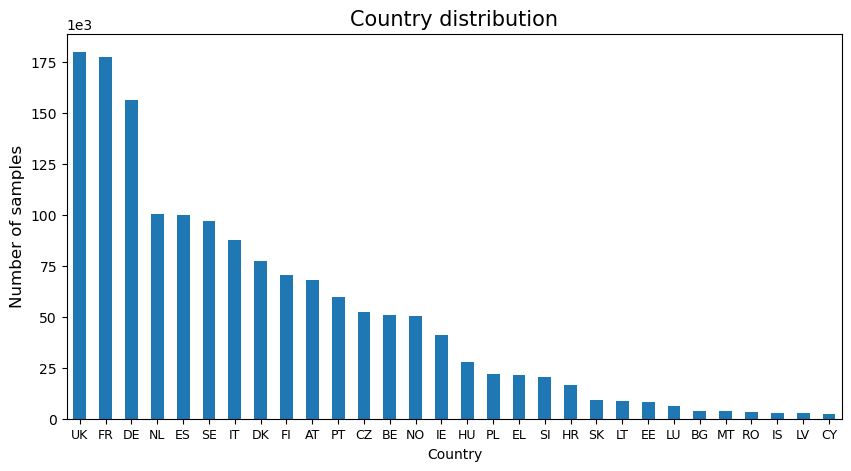

In [67]:
print(f"Number of unique countries: {df_pheno['country'].nunique():,}")
print(f"Number of samples with unknown year: {df_pheno['country'].isnull().sum():,} \
({df_pheno['country'].isnull().sum()/num_samples:.1%})")
ax = df_pheno['country'].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))
ax.set_title('Country distribution', fontsize=15)
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
if not os.path.exists('results/data/TESSy'):
    os.makedirs('results/data/TESSy')
plt.savefig('results/data/TESSy/country_distr.png', bbox_inches='tight', dpi=300)

Year distribution

Number of samples with unknown year: 0 (0.0%)


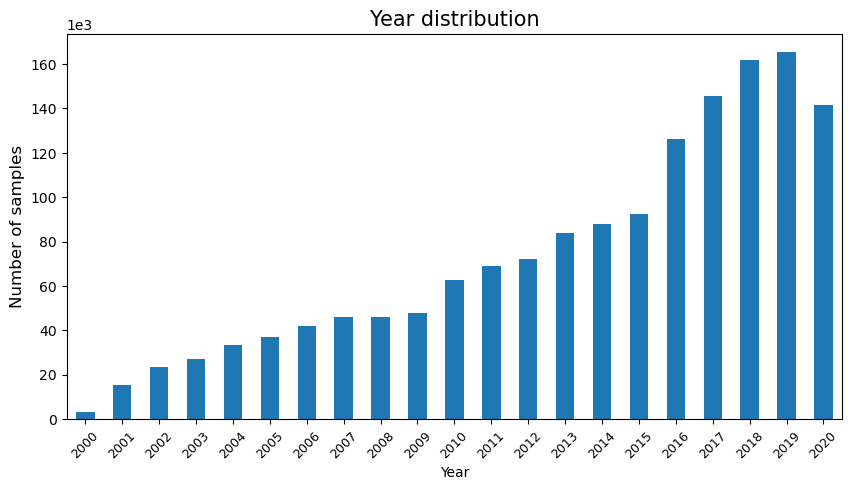

In [68]:
df_pheno['year'] = df_pheno['date'].str.split('-').str[0]
print(f"Number of samples with unknown year: {df_pheno['year'].isnull().sum():,} \
({df_pheno['year'].isnull().sum()/num_samples:.1%})")
ax = df_pheno['year'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(10, 5))
ax.set_title('Year distribution', fontsize=15)
ax.set_xlabel('Year', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=9)
ax.set_ylabel('Number of samples', fontsize=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

Age distribution

Number of unknown in age: 47,407 (3.1%)


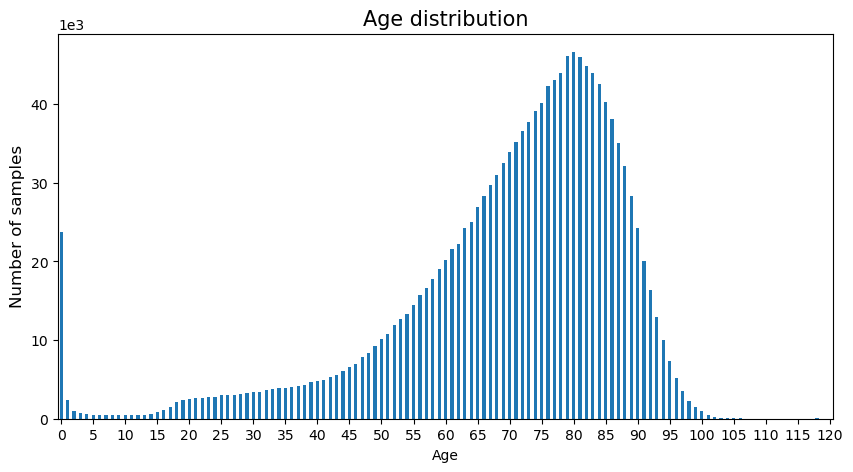

In [69]:
print(f"Number of unknown in age: {df_pheno['age'].isnull().sum():,} ({df_pheno['age'].isnull().sum()/num_samples:.1%})")
ax = df_pheno['age'].value_counts(dropna=True).sort_index().plot(kind='bar', figsize=(10, 5))
ax.set_title('Age distribution', fontsize=15)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=12)
xticks = np.arange(0, max(df_pheno['age']+1), 5)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.astype(int), rotation=0, fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.savefig('results/data/TESSy/age_distr.png', bbox_inches='tight', dpi=300)
plt.show()

Gender distribution

Number of unknown in gender: 82,437 (5.4%)
Gender imbalance (Female-Male): 53-47


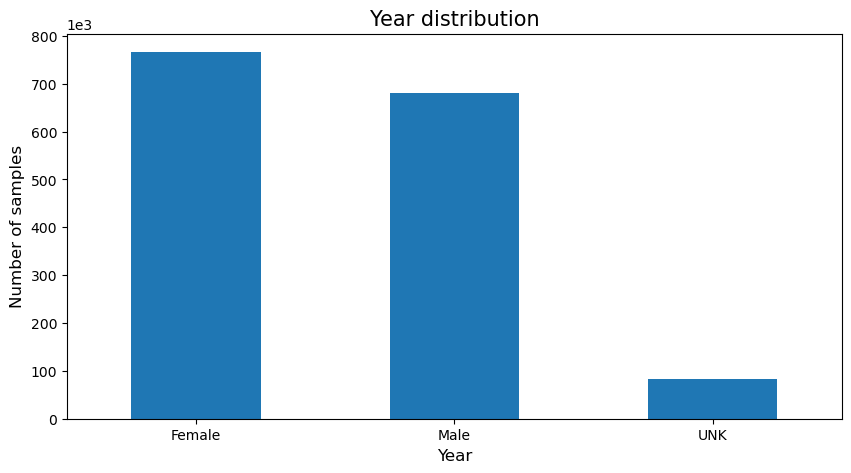

In [70]:
print(f"Number of unknown in gender: {df_pheno['gender'].isnull().sum():,} \
({df_pheno['gender'].isnull().sum()/num_samples:.1%})")
gender_counts = df_pheno['gender'].value_counts(dropna=True)
tot = gender_counts.sum()
print(f"Gender imbalance (Female-Male): {100*gender_counts['F']/tot:.0f}-{100*gender_counts['M']/tot:.0f}")
ax = df_pheno['gender'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(10, 5))
ax.set_title('Year distribution', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticklabels(['Female', 'Male', 'UNK'], rotation=0, fontsize=10)
ax.set_ylabel('Number of samples', fontsize=12)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.savefig('results/data/TESSy/gender_distr.png', bbox_inches='tight', dpi=300)

Imputation function

In [71]:
import matplotlib.ticker as mtick

def impute_col(df, col, show_distr=False, print_examples=False, random_state=42):
    print(f"Imputing column {col} from the distribution of non-NaN values")
    indices = df[df[col].isnull()].index
    examples_before = df.loc[indices, col][:5]
    if print_examples:
        print("Examples before imputation:")
        print(examples_before) 
    np.random.seed(random_state)
    sample = np.random.choice(df[col].dropna(), size=len(indices))
    if show_distr:
        if col == 'gender':
            counts = Counter(sample)
            tot = len(sample)
            print(f"Gender distribution of sample (Female-Male): {100*counts['F']/tot:.0f}-{100*counts['M']/tot:.0f}")
        else:
            fig, ax = plt.subplots(figsize=(10, 5)) 
            ax.hist(sample, bins=int((max(df[col].dropna()) - min(df[col].dropna()))), density=True)
            ax.set_title('Age distribution of imputation sample', fontsize=15)
            ax.set_xlabel('Age', fontsize=10)
            ax.set_ylabel('Density', fontsize=12)
            tick = mtick.PercentFormatter(xmax=1, decimals=1)
            ax.yaxis.set_major_formatter(tick)
            plt.show()
    df.loc[indices, col] = sample
    if print_examples:
        examples_after = df.loc[indices, col][:5]
        print(examples_after) 
    
    return df
    

Imputing column age from the distribution of non-NaN values
Examples before imputation:
7767    NaN
14086   NaN
24414   NaN
26949   NaN
28714   NaN
Name: age, dtype: float64


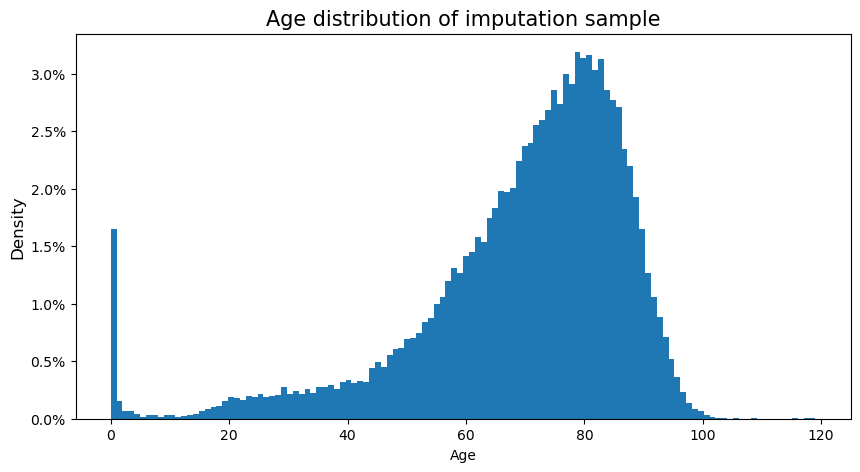

7767     70.0
14086    94.0
24414    24.0
26949    75.0
28714    62.0
Name: age, dtype: float64
Imputing column gender from the distribution of non-NaN values
Examples before imputation:
373     None
4013    None
4038    None
4041    None
4096    None
Name: gender, dtype: object
Gender distribution of sample (Female-Male): 53-47
373     M
4013    M
4038    F
4041    F
4096    M
Name: gender, dtype: object


In [72]:
impute_gender = True
impute_age = True
if impute_age:
    df_pheno = impute_col(df_pheno, 'age', show_distr=True, print_examples=True) 
if impute_gender:
    df_pheno = impute_col(df_pheno, 'gender', show_distr=True, print_examples=True)

#### Final dataset

In [73]:
df_pheno['num_phenotypes'] = df_pheno['phenotypes'].apply(lambda x: len(x))
df_pheno['num_R'] = df_pheno['phenotypes'].apply(lambda x: len([i for i in x if i.endswith('R')]))
df_pheno['num_S'] = df_pheno['phenotypes'].apply(lambda x: len([i for i in x if i.endswith('S')]))
print(f"Total number of phenotypes: {df_pheno['num_phenotypes'].sum():,}")
print(f"Total number of R phenotypes: {df_pheno['num_R'].sum():,}")
print(f"Total number of S phenotypes: {df_pheno['num_S'].sum():,}")
df_pheno.head(n=10)

Total number of phenotypes: 13,519,564
Total number of R phenotypes: 1,956,505
Total number of S phenotypes: 11,563,059


,date,country,gender,age,phenotypes,year,num_phenotypes,num_R,num_S
0,2007-03-06,AT,F,80.0,"[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]",2007,7,0,7
1,2004-01-20,AT,M,70.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2004,7,0,7
2,2003-04-09,AT,F,39.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2003,7,0,7
3,2004-08-03,AT,F,63.0,"[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]",2004,7,0,7
4,2001-08-09,AT,F,61.0,"[AMP_S, CTX_S, GEN_S, TOB_S]",2001,4,0,4
5,2004-01-05,AT,M,64.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2004,7,0,7
6,2007-11-05,AT,F,86.0,"[AMK_S, AMP_R, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]",2007,8,1,7
7,2005-02-28,AT,F,78.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2005,7,0,7
8,2006-05-09,AT,M,83.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2006,7,0,7
9,2007-10-08,AT,F,81.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]",2007,8,0,8


Plot distributions

num_phenotypes
2      16064
3      32965
4      57814
5     152098
6     166736
7     161654
8     167710
9     147450
10    145953
11    138728
12    126798
13     76532
14     58215
15     33613
16     21375
17     13196
18      7984
19      2886
20       387
21        92
22        13
Name: count, dtype: int64
Number of samples with more than one phenotype: 21 (0.0%)
Max number of phenotypes in a sample: 22


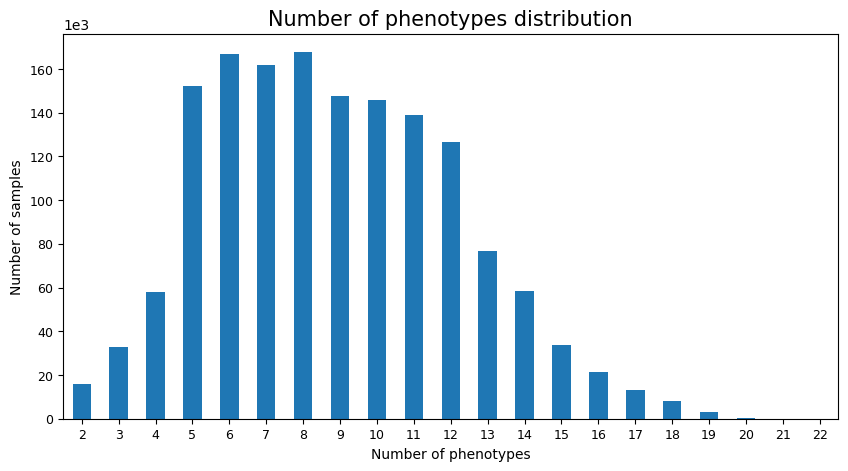

In [74]:
pheno_counts = df_pheno['num_phenotypes'].value_counts().sort_index()
print(pheno_counts)
print(f"Number of samples with more than one phenotype: {(pheno_counts > 1).sum():,} \
({(pheno_counts > 1).sum()/num_samples:.1%})")
print(f"Max number of phenotypes in a sample: {pheno_counts.index.max()}")
ax = pheno_counts.plot(kind='bar', figsize=(10, 5), fontsize=9, rot=0)
ax.set_title('Number of phenotypes distribution', fontsize=15)
ax.set_xlabel('Number of phenotypes', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/TESSy/num_phenotypes_distr.png', bbox_inches='tight', dpi=300)

Make a plot that stacks the S and R bars

Max number of R phenotypes: 17
Max number of S phenotypes: 22


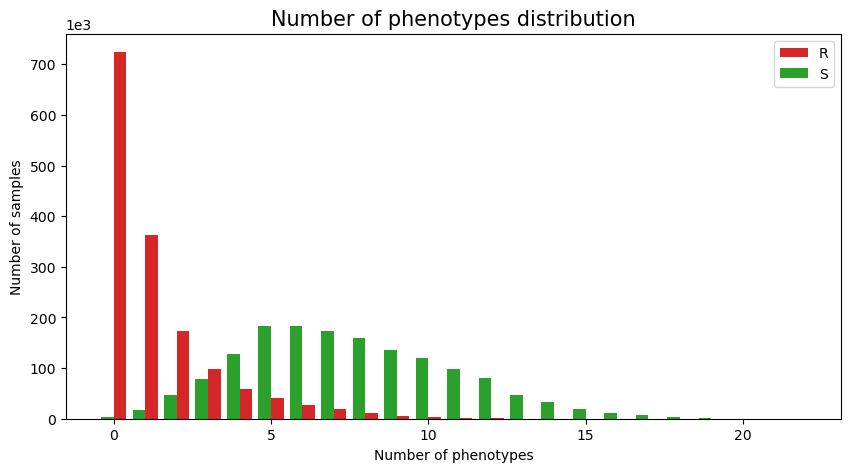

In [75]:
R_counts = df_pheno['num_R'].value_counts().sort_index()
S_counts = df_pheno['num_S'].value_counts().sort_index()
print(f"Max number of R phenotypes: {R_counts.index.max()}")
print(f"Max number of S phenotypes: {S_counts.index.max()}")
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(R_counts.index, R_counts.values, width=0.4, align='edge', label='R', color='tab:red')
ax.bar(S_counts.index, S_counts.values, width=-0.4, align='edge', label='S', color='tab:green')
ax.set_title('Number of phenotypes distribution', fontsize=15)
ax.set_xlabel('Number of phenotypes', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.legend()
plt.savefig('results/data/TESSy/num_phenotypes_R_S_distr.png', bbox_inches='tight', dpi=300)
plt.show()

In [76]:
print(f"Number of samples in final dataset: {df_pheno.shape[0]:,}")
df_pheno.head(n=10)
df_pheno.to_pickle('data/TESSy_parsed.pkl')

Number of samples in final dataset: 1,528,263


In [77]:
df_read = pd.read_pickle('data/TESSy_parsed.pkl')
df_read.head()

,date,country,gender,age,phenotypes,year,num_phenotypes,num_R,num_S
0,2007-03-06,AT,F,80.0,"[AMK_S, CAZ_S, CIP_S, CTX_S, GEN_S, IPM_S, TOB_S]",2007,7,0,7
1,2004-01-20,AT,M,70.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2004,7,0,7
2,2003-04-09,AT,F,39.0,"[AMK_S, AMP_S, CAZ_S, CIP_S, CTX_S, GEN_S, TOB_S]",2003,7,0,7
3,2004-08-03,AT,F,63.0,"[AMK_S, GEN_S, AMP_S, CIP_S, CAZ_S, CTX_S, TOB_S]",2004,7,0,7
4,2001-08-09,AT,F,61.0,"[AMP_S, CTX_S, GEN_S, TOB_S]",2001,4,0,4


In [78]:
df_read.dtypes

date               object
country            object
gender             object
age               float64
phenotypes         object
year               object
num_phenotypes      int64
num_R               int64
num_S               int64
dtype: object

### Preprocessing for NLP

In [ ]:
df = df_read.copy()
